# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset diambil dari https://raw.githubusercontent.com/dodyks/Clustering-Model/refs/heads/main/clustering_data.csv

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Data Loading
df = pd.read_csv('https://raw.githubusercontent.com/dodyks/Clustering-Model/refs/heads/main/clustering_data.csv')
df.head()

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,G28036,Bogor,Internet Banking,< 1 Tahun,69.0,Laki-laki,Menikah,3,Doktor,1,0,0,0,0,0,1,747,44607
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
3,G04482,Bandung,Cabang,< 1 Tahun,45.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,431,417250579
4,G07807,Bandung,Aplikasi Digital,< 1 Tahun,34.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,184,453573593


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. **Memahami Struktur Data**

Tinjau jumlah baris dan kolom dalam dataset.
Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28129 entries, 0 to 28128
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GCIF                        28129 non-null  object 
 1   Area                        28129 non-null  object 
 2   Jalur_Pembukaan             28129 non-null  object 
 3   Vintage                     28129 non-null  object 
 4   Usia                        24084 non-null  float64
 5   Jenis_Kelamin               28129 non-null  object 
 6   Status_Perkawinan           28129 non-null  object 
 7   Jumlah_Anak                 28129 non-null  int64  
 8   Pendidikan                  28129 non-null  object 
 9   Produk_Tabungan             28129 non-null  int64  
 10  Produk_Deposito             28129 non-null  int64  
 11  Produk_Kartu_Kredit         28129 non-null  int64  
 12  Produk_Kredit_Rumah         28129 non-null  int64  
 13  Produk_Kredit_Kendaraan     281

Terdapat perbedaan jumlah pada kolom Usia

In [ ]:
#statistik deskriptif dari dataset yang digunakan
df.describe(include="all")

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
count,28129,28129,28129,28129,24084.000000,28129,28129,28129.000000,28129,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,2.812900e+04
unique,25676,6,4,3,NaN,2,4,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,G20000,Jakarta,Telemarketing,2 - 3 Tahun,NaN,Laki-laki,Menikah,NaN,Sarjana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,19,7017,10262,13953,NaN,18716,11839,NaN,7691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,42.610613,NaN,NaN,1.300793,NaN,0.926055,0.603683,0.332966,0.591525,0.164066,0.537772,3.156067,406.295922,2.490444e+08
std,NaN,NaN,NaN,NaN,12.353763,NaN,NaN,1.442242,NaN,0.261686,0.489140,0.471283,0.491561,0.370342,0.498580,1.059098,180.272928,1.582262e+08
min,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,80.000000,1.028000e+03
25%,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,282.000000,1.210965e+08
50%,NaN,NaN,NaN,NaN,43.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,392.000000,2.411094e+08
75%,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,3.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,498.000000,3.592035e+08


In [ ]:
# prompt: kolom numerik

# Identify numerical columns
kolomnumerik = df.select_dtypes(include=['number']).columns
# Print the numerical columns
kolomnumerik

Index(['Usia', 'Jumlah_Anak', 'Produk_Tabungan', 'Produk_Deposito',
       'Produk_Kartu_Kredit', 'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [ ]:
# prompt: kolom kategorik

# Identify categorical columns
kolomkategorik = df.select_dtypes(include=['object']).columns
# Print the categorical columns
kolomkategorik

Index(['GCIF', 'Area', 'Jalur_Pembukaan', 'Vintage', 'Jenis_Kelamin',
       'Status_Perkawinan', 'Pendidikan'],
      dtype='object')

## 2. Data Understanding

In [ ]:
df.groupby(('Area'))['Area'].count()

,Area
Area,
Bandung,6917
Bogor,1191
Jakarta,7017
Jogja,3001
Solo,5001
Surabaya,5002


In [ ]:
df.groupby(('Vintage'))['Vintage'].count()

,Vintage
Vintage,
2 - 3 Tahun,13953
< 1 Tahun,9278
> 4 Tahun,4898


In [ ]:
df.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

,Jalur_Pembukaan
Jalur_Pembukaan,
Aplikasi Digital,6216
Cabang,5856
Internet Banking,5795
Telemarketing,10262


In [ ]:
df.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

,Status_Perkawinan
Status_Perkawinan,
Belum Menikah,8168
Cerai,4077
Janda/Duda,4045
Menikah,11839


**5. Analisis Distribusi dan Korelasi**

Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

**6. Visualisasi Data**

Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menghapus atau Menangani Data Kosong (Missing Values) dan Data Duplikat

In [ ]:
df.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,4045
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,0
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [ ]:
df.duplicated().sum()

0

**Penanganan Outlier**

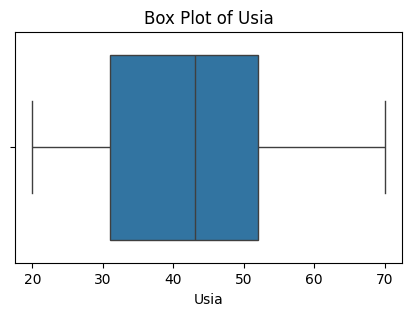

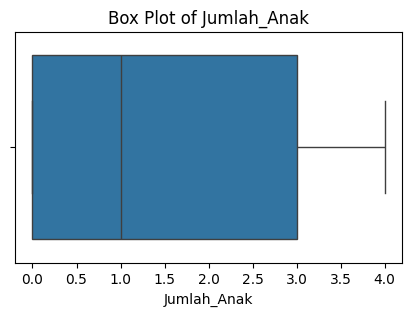

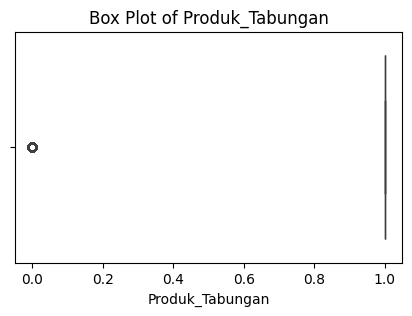

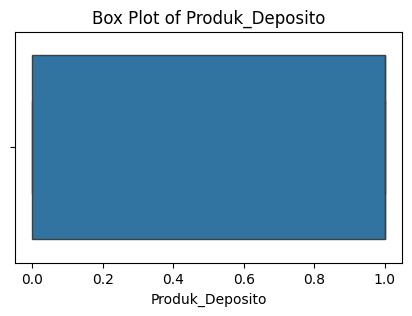

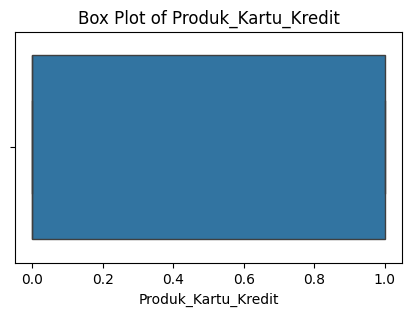

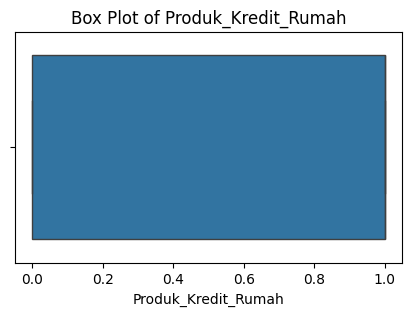

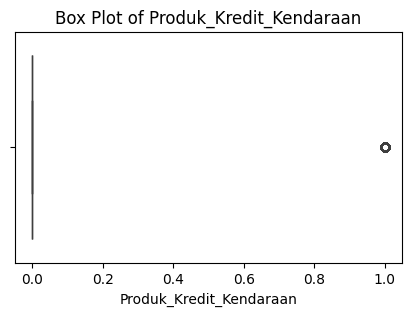

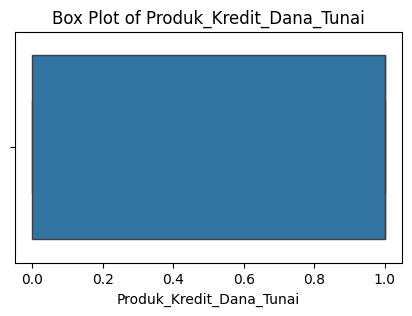

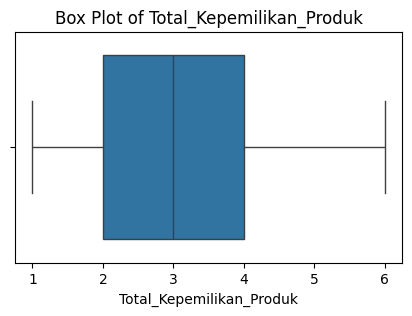

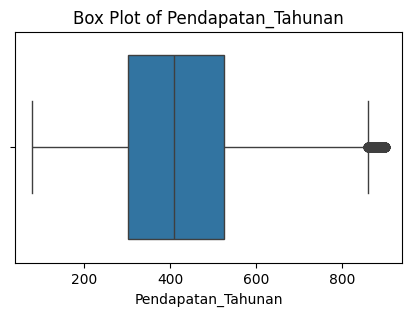

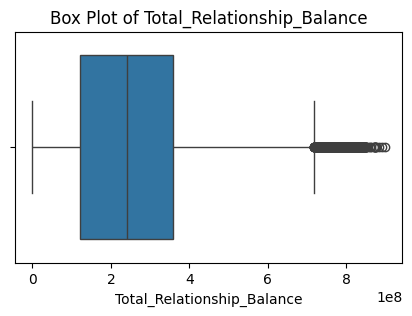

In [ ]:
for feature in kolomnumerik:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
Q1 = df[kolomnumerik].quantile(0.25)
Q3 = df[kolomnumerik].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik dan Menggabungkan kembali dengan kolom kategorikal

# Identify numerical and categorical columns
kolomnumerik = df.select_dtypes(include=['number']).columns
kolomkategorikal = df.select_dtypes(exclude=['number']).columns

# Calculate IQR and identify outliers for numerical features
Q1 = df[kolomnumerik].quantile(0.25)
Q3 = df[kolomnumerik].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[~((df[kolomnumerik] < lower_bound) | (df[kolomnumerik] > upper_bound)).any(axis=1)]

# Concatenate with categorical columns
df_final = pd.concat([df_filtered[kolomnumerik], df[kolomkategorikal]], axis=1)

print(df_final.head())

   Usia  Jumlah_Anak  Produk_Tabungan  Produk_Deposito  Produk_Kartu_Kredit  \
0  69.0          3.0              1.0              0.0                  0.0   
1  23.0          0.0              1.0              0.0                  0.0   
2  30.0          0.0              1.0              0.0                  0.0   
3  45.0          0.0              1.0              0.0                  0.0   
4  34.0          0.0              1.0              0.0                  0.0   

   Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  Produk_Kredit_Dana_Tunai  \
0                  0.0                      0.0                       0.0   
1                  0.0                      0.0                       0.0   
2                  0.0                      0.0                       0.0   
3                  0.0                      0.0                       0.0   
4                  0.0                      0.0                       0.0   

   Total_Kepemilikan_Produk  Pendapatan_Tahunan  Total_Relatio

## 2. Pengecekan Outlier

In [ ]:
df.count()

,0
GCIF,24084
Area,24084
Jalur_Pembukaan,24084
Vintage,24084
Usia,24084
Jenis_Kelamin,24084
Status_Perkawinan,24084
Jumlah_Anak,24084
Pendidikan,24084
Produk_Tabungan,24084


In [ ]:
#mendeteksi data outlier (menggunakan Z-Score)
from scipy import stats
z_scores = stats.zscore(df[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
df = df[(z_scores < 3).all(axis=1)] # menghaps data dengan Z-Score lebih dari 3

In [ ]:
df.count()

,0
GCIF,23704
Area,23704
Jalur_Pembukaan,23704
Vintage,23704
Usia,23704
Jenis_Kelamin,23704
Status_Perkawinan,23704
Jumlah_Anak,23704
Pendidikan,23704
Produk_Tabungan,23704


## Filtering Data Telemakerting Only

In [ ]:
df_0 = df[df['Jalur_Pembukaan']== 'Telemarketing']

In [ ]:
df_0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [ ]:
df_0 = df_0.drop(columns=['GCIF', 'Jalur_Pembukaan']).reset_index(drop=True)

In [ ]:
df_0

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


## Pembagian Data Eksperimen

Experiment 0 --> Semua Variabel Digunakan
Experiment 1 --> Menggunakan Demographics
Experiment 2 --> Menggunakan Financial Related Variable

In [ ]:
df_1 = df_0.iloc[:,0:7]

In [ ]:
df_1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [ ]:
df_2 = df_0.iloc[:,7:17]

In [ ]:
df_2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


## Melakukan Encoding untuk Data Category (Dummy)

In [ ]:
df_1 = pd.get_dummies(df_1, columns=['Area','Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan', 'Vintage'])

In [ ]:
df_1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,...,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,False,...,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,False,...,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False


## Standarisasi Data Numerik

In [ ]:
predname_num = df_2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(df_2)) # Assign the scaled data to X_num

In [ ]:
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


In [ ]:
X_num.columns = predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


## Pengecekan Korelasi

In [ ]:
corrtest1 = df_1.corr().abs()
corrtest2 = X_num.corr().abs()

In [ ]:
df_1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,...,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,False,...,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,False,...,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


In [ ]:
#gabungan df_1 dan X_num
data_gabung = pd.concat([df_1, X_num], axis=1, join='inner')
data_gabung

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,...,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,False,False,True,False,False,False,True,False,...,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,False,False,False,False,False,True,True,False,...,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,False,False,False,False,True,False,True,False,...,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,False,False,True,False,False,False,True,False,...,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,False,False,True,False,False,False,False,True,...,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,...,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,False,False,True,False,False,False,True,False,...,False,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,True,False,False,False,False,False,True,False,...,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,False,False,False,True,False,False,True,False,...,False,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.

  Model akan menggunakan 2 jenis algoritma clustering:

  **K-Means**
  
  **K=Medoid**

2. Latih model dengan data menggunakan algoritma tersebut.

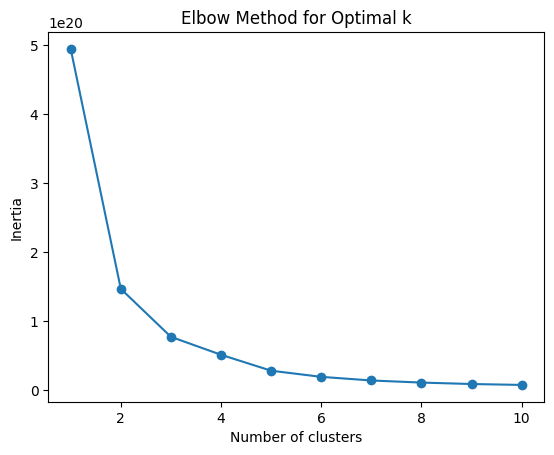

In [ ]:
# prompt: Menentukan Jumlah Cluster Optimal (Elbow Method)

# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[kolomnumerik])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### **K-Means**

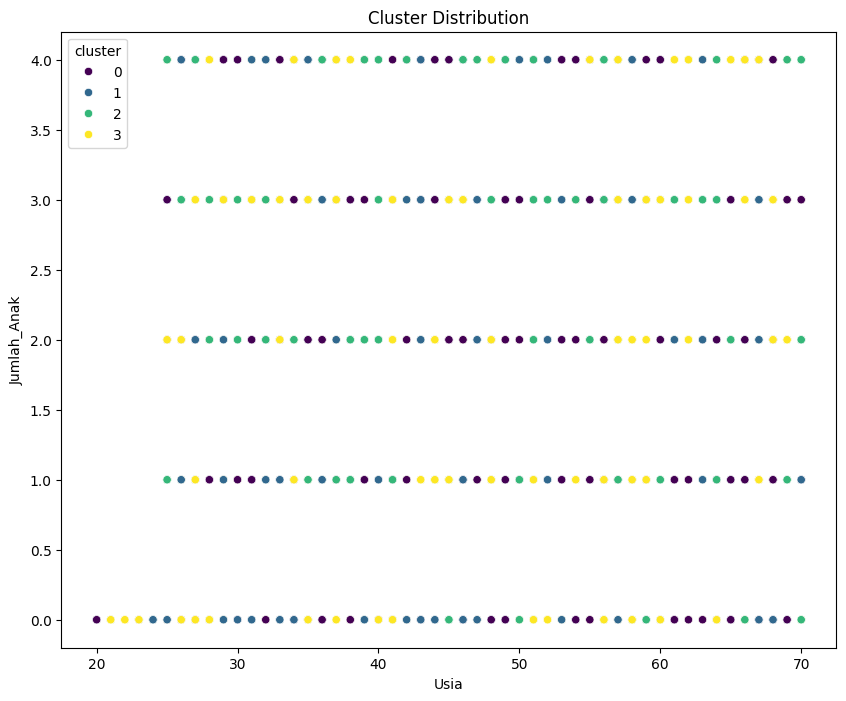

In [ ]:
# prompt: menentukan jumlah cluster optimal (ganti sesuai hasil Elbow Method), terapkan K-Means, Tambahkan hasil clustering ke dataset asli, Visualisasi Distribusi Cluster (Jika ada 2 fitur numerik dominan)

# Determine the optimal number of clusters (replace with the result from the Elbow Method)
optimal_k = 4  # Example: Replace with the optimal k value from the Elbow Method

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df[kolomnumerik])

# Visualize cluster distribution (if there are 2 dominant numerical features)
if len(kolomnumerik) >= 2:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=df[kolomnumerik[0]], y=df[kolomnumerik[1]], hue=df['cluster'], palette='viridis')
    plt.title('Cluster Distribution')
    plt.xlabel(kolomnumerik[0])
    plt.ylabel(kolomnumerik[1])
    plt.show()

In [ ]:
# varisi hyperparameter (jumlah cluster)
# experiment 0
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_gabung)

In [ ]:
# varisi hyperparameter (jumlah cluster)
# experiment 1
for n_clusters in range(3, 6):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(df_1)

In [ ]:
# varisi hyperparameter (jumlah cluster)
# eksperimen 2
for n_clusters in range(3, 6):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(X_num)

### **K-Medoids**

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
#eksperimen 0
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_gabung)

In [ ]:
#eksperimen 1
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(df_1)

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


In [ ]:
#eksperimen 3
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(X_num)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

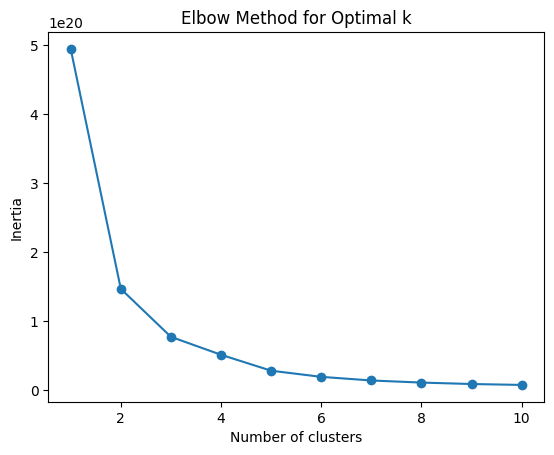

In [ ]:
# prompt: Menentukan Jumlah Cluster Optimal (Elbow Method)

# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[kolomnumerik])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Hitung Silhouette Score K-Means

In [ ]:
# varisi hyperparameter (jumlah cluster)
# eksperimen 0
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_gabung)
    silhouette_avg = silhouette_score(data_gabung, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df_0['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.4344119125809096
Silhouette Score (K-Means) -4 : 0.37640711200336574
Silhouette Score (K-Means) -5 : 0.31970232146638783


**Silhouette Score $< 0.55$** sehingga tidak memenuhi untuk data yang menggunakan semua variabel

In [ ]:
#eksperimen 1
for n_clusters in range(3, 6):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(df_1)
  silhouette_avg = silhouette_score(df_1, cluster_labels)
  print(f"Silhouette Score (K-Mens) -"+str(n_clusters)+" : "+str(silhouette_avg))
  df_0['Clustering_KMeans_Exp1_'+str(n_clusters)] =cluster_labels

Silhouette Score (K-Mens) -3 : 0.4975291490743056
Silhouette Score (K-Mens) -4 : 0.4831834170439106
Silhouette Score (K-Mens) -5 : 0.4130446179089461


**Silhouette Score $< 0.55$** sehingga tidak memenuhi untuk data yang menggunakan demographics

In [ ]:
# varisi hyperparameter (jumlah cluster)
#eksperimen 2
for n_clusters in range(3, 6):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = kmeans.fit_predict(X_num)
  silhouette_avg = silhouette_score(X_num, cluster_labels)
  print(f"Silhouette Score (K-Mens) -"+str(n_clusters)+" : "+str(silhouette_avg))
  df_0['Clustering_KMeans_Exp2_'+str(n_clusters)] =cluster_labels

Silhouette Score (K-Mens) -3 : 0.17568395122545125
Silhouette Score (K-Mens) -4 : 0.17500826370194086
Silhouette Score (K-Mens) -5 : 0.18806929666647304


**Silhouette Score $< 0.55$** sehingga tidak memenuhi untuk data yang menggunakan Financial Related Variable

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### Feature Selection K-Means menggunakan PCA

In [ ]:
# prompt: pca dan cek silhouette score

from sklearn.decomposition import PCA

# Assuming data_combined, data1, and X_num are defined as in your original code

# Experiment 0 with PCA
for n_clusters in range(3, 6):
    pca = PCA(n_components=1)  # Reduce to 2 principal components
    data_gabung_pca = pca.fit_transform(data_gabung)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_gabung_pca)
    silhouette_avg = silhouette_score(data_gabung_pca, cluster_labels)
    print(f"Silhouette Score (K-Means with PCA) - Exp0 - {n_clusters} clusters: {silhouette_avg}")

# Experiment 1 with PCA
for n_clusters in range(3, 6):
    pca = PCA(n_components=1)
    df_1_pca = pca.fit_transform(df_1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df_1_pca)
    silhouette_avg = silhouette_score(df_1_pca, cluster_labels)
    print(f"Silhouette Score (K-Means with PCA) - Exp1 - {n_clusters} clusters: {silhouette_avg}")

# Experiment 2 with PCA
for n_clusters in range(3, 6):
    pca = PCA(n_components=1)
    X_num_pca = pca.fit_transform(X_num)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_num_pca)
    silhouette_avg = silhouette_score(X_num_pca, cluster_labels)
    print(f"Silhouette Score (K-Means with PCA) - Exp2 - {n_clusters} clusters: {silhouette_avg}")

Silhouette Score (K-Means with PCA) - Exp0 - 3 clusters: 0.5748662082160519
Silhouette Score (K-Means with PCA) - Exp0 - 4 clusters: 0.5848593568034199
Silhouette Score (K-Means with PCA) - Exp0 - 5 clusters: 0.5514035295021886
Silhouette Score (K-Means with PCA) - Exp1 - 3 clusters: 0.5754845612660104
Silhouette Score (K-Means with PCA) - Exp1 - 4 clusters: 0.5613733773005974
Silhouette Score (K-Means with PCA) - Exp1 - 5 clusters: 0.5562971135062708
Silhouette Score (K-Means with PCA) - Exp2 - 3 clusters: 0.5672983526637986
Silhouette Score (K-Means with PCA) - Exp2 - 4 clusters: 0.7078309808794665
Silhouette Score (K-Means with PCA) - Exp2 - 5 clusters: 0.7326338186285352


Setelah menggunakan PCA, diperoleh Silhouette Score > 0.55 untuk

1. Data semua Variabel, dengan jumlah cluster 3, 4, dan 5

2. Data menggunakan Demographics, dengan jumlah cluster 3, 4, dan 5

3. Data menggunakan Financial Related Variable, dengan jumlah cluster 3

serta diperoleh Silhouette Score > 0.55 untuk Data menggunakan Financial Related Variable, dengan jumlah cluster 4 dan 5


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

### Scatter Plot Hasil Clustering

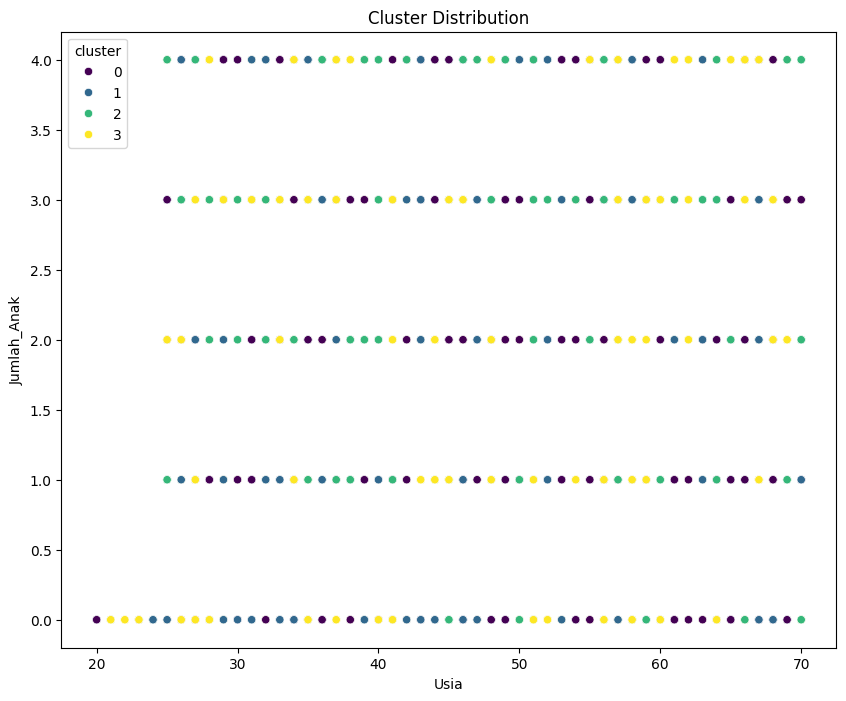

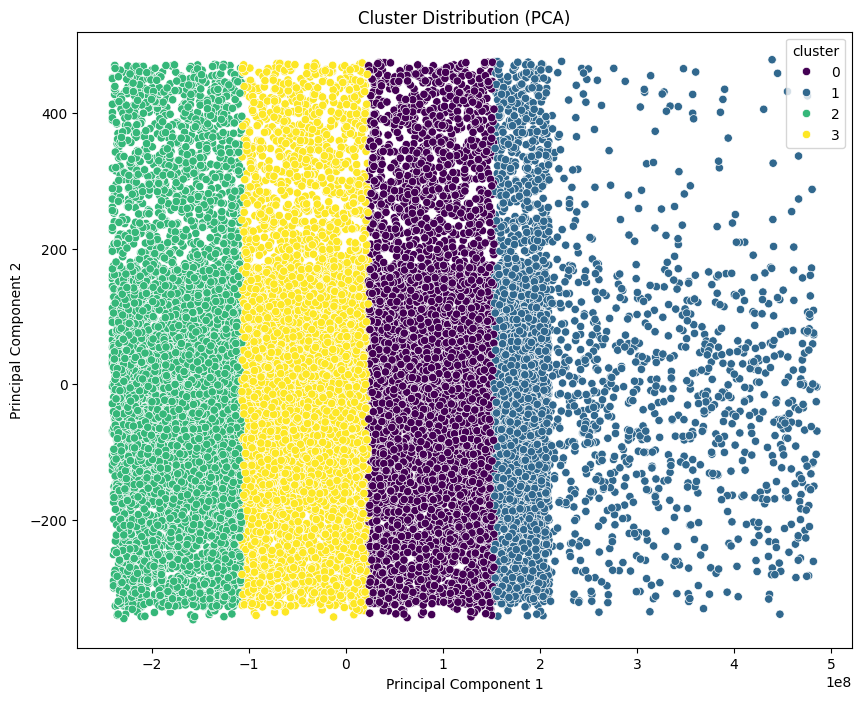

In [ ]:
# Visualize cluster distribution (if there are 2 dominant numerical features)
if len(kolomnumerik) >= 2:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=df[kolomnumerik[0]], y=df[kolomnumerik[1]], hue=df['cluster'], palette='viridis')
    plt.title('Cluster Distribution')
    plt.xlabel(kolomnumerik[0])
    plt.ylabel(kolomnumerik[1])
    plt.show()

# If you have more than 2 numerical features, use PCA for visualization
from sklearn.decomposition import PCA

if len(kolomnumerik) > 2:
    pca = PCA(n_components=2)  # Reduce to 2 principal components
    principal_components = pca.fit_transform(df[kolomnumerik])

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=df['cluster'], palette='viridis')
    plt.title('Cluster Distribution (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

### 2D PCA projection

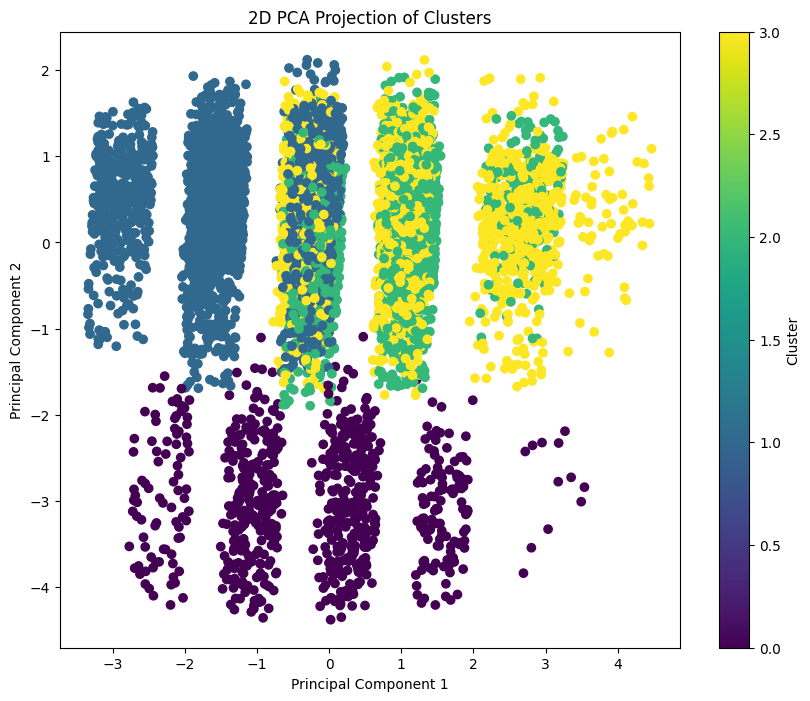

In [ ]:
# prompt: Tampilkan hasil clustering dalam bentuk visualisasi 2D PCA projection.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(X_num)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_num)

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
plt.title('2D PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# prompt: Inisialisasi dan melatih data X_num dengan model KMeans with PCA dengan jumlah cluster = 5 dan Fungsi untuk analisis karakteristik cluster, cluster_characteristics = analyze_cluster_characteristics(df, kolomnumerik)
# cluster_characteristics

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Inisialisasi PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=1)  # Contoh: Mengurangi dimensi menjadi 1

# Melakukan transformasi PCA pada data X_num
X_num_pca = pca.fit_transform(X_num)

# Inisialisasi dan melatih model KMeans dengan data hasil PCA
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_num_pca)

# Mendapatkan label cluster untuk setiap data point
cluster_labels = kmeans.labels_

# Fungsi untuk analisis karakteristik cluster
def analyze_cluster_characteristics(df, kolomnumerik):
    # Menggabungkan label cluster dengan dataframe asli
    df['cluster'] = cluster_labels

    # Menampilkan statistik deskriptif untuk setiap cluster
    cluster_stats = df.groupby('cluster')[kolomnumerik].describe()
    return cluster_stats

# Memanggil fungsi untuk analisis karakteristik cluster
cluster_characteristics = analyze_cluster_characteristics(df_0, X_num.columns)
cluster_characteristics

Produk_Tabungan                                               \
                  count      mean       std  min  25%  50%  75%  max   
cluster                                                                
0                3113.0  0.910697  0.285226  0.0  1.0  1.0  1.0  1.0   
1                 727.0  0.980743  0.137522  0.0  1.0  1.0  1.0  1.0   
2                2560.0  0.917188  0.275652  0.0  1.0  1.0  1.0  1.0   
3                1803.0  0.869107  0.337377  0.0  1.0  1.0  1.0  1.0   
4                 450.0  0.902222  0.297345  0.0  1.0  1.0  1.0  1.0   

        Produk_Deposito            ... Pendapatan_Tahunan         \
                  count      mean  ...                75%    max   
cluster                            ...                             
0                3113.0  0.597816  ...             525.00  900.0   
1                 727.0  0.939477  ...             503.00  895.0   
2                2560.0  0.791406  ...             510.00  900.0   
3                1803.0  0.331115  ...             538.50  900.0   
4                 450.0  0.022222  ...             554.75  893.0   

        Total_Relationship_Balance                                          \
                             count          mean           std         min   
cluster                                                                      
0                           3113.0  2.255675e+08  1.285752e+08   1016565.0   
1                            727.0  3.882093e+08  1.880638e+08  45213944.0   
2                           2560.0  2.324847e+08  1.293343e+08   1094925.0   
3                           1803.0  2.204092e+08  1.290101e+08   1117872.0   
4                            450.0  2.295905e+08  1.436002e+08      1028.0   

                                                               
                  25%          50%           75%          max  
cluster                                                        
0        1.146100e+08  224495793.0  3.380188e+08  449975673.0  
1        2.369622e+08  394753879.0  5.400383e+08  725994156.0  
2        1.196901e+08  235969268.5  3.459313e+08  449866240.0  
3        1.113457e+08  211866881.0  3.305968e+08  497750900.0  
4        1.099075e+08  226187072.0  3.475235e+08  499981415.0  

[5 rows x 72 columns]

Tulis hasil interpretasinya di sini.
1. Cluster 0:
Produk Tabungan: Sebagian besar nasabah di cluster ini memiliki tabungan (mean = 0.87). Ini menunjukkan mayoritas nasabah menggunakan produk tabungan.

  Produk Deposito: Sebagian kecil nasabah memiliki deposito (mean = 0.69). Deposito kurang diminati oleh nasabah di cluster ini.

  Total Relationship Balance: Saldo rata-rata sebesar 426 juta dengan standar deviasi yang tinggi, menunjukkan adanya perbedaan besar antara nasabah dalam cluster ini.

  Analisis : Nasabah pada cluster ini memiliki jumlah saldo menengah dan preferensi terhadap tabungan lebih tinggi daripada deposito.


2. Cluster 1: Produk Tabungan: Mirip dengan cluster 0, sebagian besar nasabah memiliki tabungan (mean = 0.87).

  Produk Deposito: Proporsi nasabah dengan deposito sangat rendah (mean = 0.33), menunjukkan produk ini tidak menjadi pilihan utama di cluster ini.

  Total Relationship Balance: Saldo rata-rata sebesar 330 juta, lebih rendah dibandingkan cluster 0.

  Analisis : Nasabah pada cluster 1 memiliki dengan saldo lebih rendah daripada cluster 1, sedikit yang menggunakan deposito.

3. Cluster 2 : Produk Tabungan: Mayoritas nasabah memiliki tabungan (mean = 0.93), menunjukkan preferensi kuat untuk produk ini.

  Produk Deposito: Proporsi nasabah dengan deposito lebih tinggi dibandingkan cluster 1 (mean = 0.55).

  Total Relationship Balance: Saldo rata-rata sebesar 350 juta, sedikit lebih tinggi dibandingkan cluster 1.

  Analisis : Nasabah pada cluster 2 memiliki saldo rata-rata dan preferensi kuat terhadap tabungan.

4. Cluster 3: Produk Tabungan: Hampir semua nasabah di cluster ini memiliki tabungan (mean = 0.99).

  Produk Deposito: Deposito juga lebih banyak digunakan (mean = 0.73) dibandingkan cluster lain.
  
  Total Relationship Balance: Saldo rata-rata sebesar 257 juta, menunjukkan bahwa nasabah di cluster ini mungkin berada di kelas menengah.

  Analisis : Nasabah pada cluster 3 memiliki dengan saldo lebih rendah tetapi cenderung menggunakan deposito lebih sering dibandingkan cluster lainnya.
  

5. Cluster 4: Produk Tabungan: Rata-rata penggunaan tabungan lebih rendah dibandingkan cluster lain (mean = 0.82).

  Produk Deposito: Proporsi nasabah dengan deposito paling tinggi di antara semua cluster (mean = 0.88).

  Total Relationship Balance: Saldo rata-rata sebesar 404 juta, menunjukkan potensi nasabah dengan aset besar.

  Analisis : Nasabah pada cluster ini memiliki saldo besar dan proporsi penggunaan deposito paling tinggi, menunjukkan bahwa mereka adalah kelompok potensial untuk produk investasi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

**Data dengan silhouette score > 0.70 adalah data X_num, yaitu data yang menggunakan Financial Related Variable dengan menggunakan metode K-Means Clustering dengan Feature Selection PCA.**

In [ ]:
# prompt: Simpan hasilnya ke dalam file CSV.

X_num.to_csv('clustering_results.csv', index=False)